In [2]:
library('tidyverse')
library('dplyr')
library('ggplot2')
library('stringr')

In [3]:
getwd()

[1] "/Users/habbasi/Documents/Broad/Broad_collaborative_projects /Assay_Dev_projects/Tissue_projects/2016_10_19_InSitu_Expression_Hacohen_Lab_Paul_Hoover_Partners/Scripts"

In [6]:
df <- read_csv('../Data/data.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  Image_Location = col_character(),
  Analysis_Region = col_character(),
  Analysis_Inputs = col_character(),
  Classification = col_character()
)

See spec(...) for full column specifications.



In [5]:
head(data)

X1,Image_Location,Analysis_Region,Analysis_Inputs,Object_Id,XMin,XMax,YMin,YMax,Opal_520_Copies,⋯,Opal_690_Cell_Intensity,Opal_690_Avg_Intensity,Cell_Area_(µm²),Cytoplasm_Area_(µm²),Nucleus_Area_(µm²),Nucleus_Perimeter_(µm),Nucleus_Roundness,X,Y,Classification
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,ExpPHa07_1_b,outline,Class List:;Classifier:;Classifier Output Type:Mask;Classify Registered:;Image Zoom:1;nuclear_dye:DAPI;num_probes:4;detect_cells:true;nuclear_contrast:0.889;nuclear_min_intensity:1;nuclear_segg_agg:0.65;nuclear_fill_holes:false;nuclear_min_area:10;nuclear_max_area:100;nuclear_roundness:0.1;cyto_radius:3;localize_results:false;min_plus1:1;min_plus2:4;min_plus3:10;min_plus4:16;num_phenotypes:0;verbose:true;FISH Probe 1:Opal 520;probe_contrast_threshold:0.621;probe_min_intensity:0.25;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.25;probe_segg_agg:0.95;FISH Probe 2:Opal 570;probe_contrast_threshold:0.546;probe_min_intensity:0.17;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.17;probe_segg_agg:0.95;FISH Probe 3:Opal 620;probe_contrast_threshold:0.529;probe_min_intensity:0.084;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.084;probe_segg_agg:0.95;FISH Probe 4:Opal 690;probe_contrast_threshold:0.508;probe_min_intensity:0.089;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.15;probe_segg_agg:0.95;output_image:Colocalization,0,1819,1837,1136,1155,5,⋯,0.000000,0.000000,54.60511,34.68162,19.92348,19.34215,0.716581,1828,1145,UNCLASSIFIED
1,ExpPHa07_1_b,outline,Class List:;Classifier:;Classifier Output Type:Mask;Classify Registered:;Image Zoom:1;nuclear_dye:DAPI;num_probes:4;detect_cells:true;nuclear_contrast:0.889;nuclear_min_intensity:1;nuclear_segg_agg:0.65;nuclear_fill_holes:false;nuclear_min_area:10;nuclear_max_area:100;nuclear_roundness:0.1;cyto_radius:3;localize_results:false;min_plus1:1;min_plus2:4;min_plus3:10;min_plus4:16;num_phenotypes:0;verbose:true;FISH Probe 1:Opal 520;probe_contrast_threshold:0.621;probe_min_intensity:0.25;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.25;probe_segg_agg:0.95;FISH Probe 2:Opal 570;probe_contrast_threshold:0.546;probe_min_intensity:0.17;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.17;probe_segg_agg:0.95;FISH Probe 3:Opal 620;probe_contrast_threshold:0.529;probe_min_intensity:0.084;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.084;probe_segg_agg:0.95;FISH Probe 4:Opal 690;probe_contrast_threshold:0.508;probe_min_intensity:0.089;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.15;probe_segg_agg:0.95;output_image:Colocalization,1,1809,1825,1137,1157,0,⋯,0.000000,0.000000,59.27851,41.32278,17.95573,17.35834,0.717423,1817,1147,UNCLASSIFIED
2,ExpPHa07_1_b,outline,Class List:;Classifier:;Classifier Output Type:Mask;Classify Registered:;Image Zoom:1;nuclear_dye:DAPI;num_probes:4;detect_cells:true;nuclear_contrast:0.889;nuclear_min_intensity:1;nuclear_segg_agg:0.65;nuclear_fill_holes:false;nuclear_min_area:10;nuclear_max_area:100;nuclear_roundness:0.1;cyto_radius:3;localize_results:false;min_plus1:1;min_plus2:4;min_plus3:10;min_plus4:16;num_phenotypes:0;verbose:true;FISH Probe 1:Opal 520;probe_contrast_threshold:0.621;probe_min_intensity:0.25;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.25;probe_segg_agg:0.95;FISH Probe 2:Opal 570;probe_contrast_threshold:0.546;probe_min_intensity:0.17;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.17;probe_segg_agg:0.95;FISH Probe 3:Opal 620;probe_contrast_threshold:0.529;probe_min_intensity:0.084;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.084;probe_segg_agg:0.95;FISH Probe 4:Opal 690;probe_contrast_threshold:0.508;probe_min_intensity:0.089;probe_min_spot_size:0.3;probe_max_spot_size:20;probe_copy_intensity:0.15;pro

In [12]:
d = data %>% select(Image_Location) %>% unique


p = data %>% filter(Image_Location == "ExpPHa07_1_a")

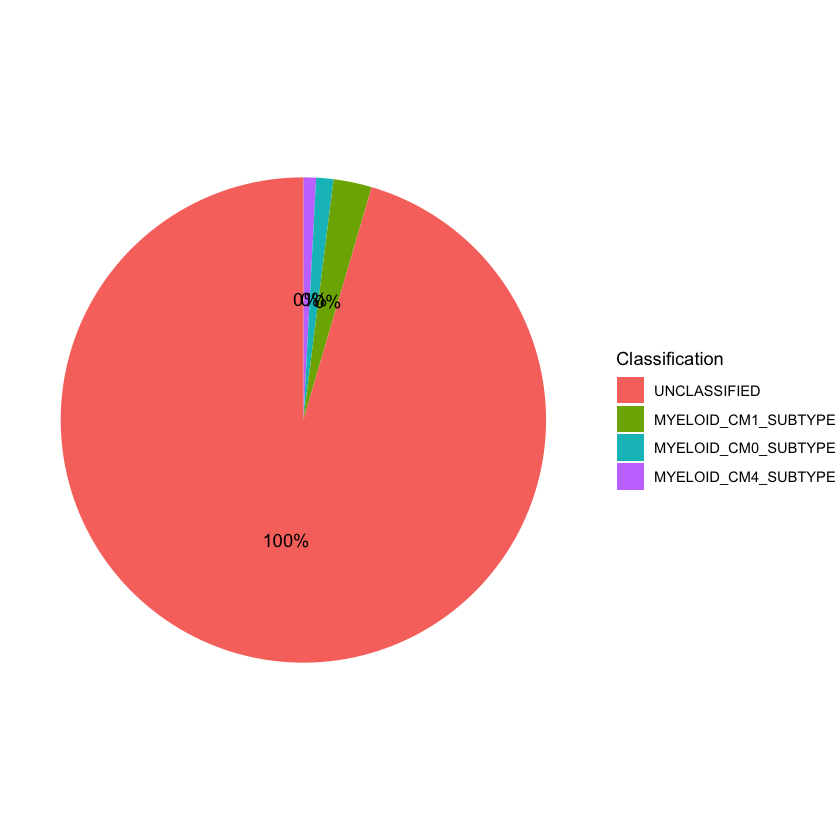

In [28]:



p %>%
  group_by(Classification) %>% tally() %>% 
     ungroup() %>% 
        mutate(count = n/sum(n)) %>% arrange(desc(count)) %>% 
    mutate(Classification=factor(Classification, levels=as.character(Classification))) %>%
  ggplot(aes(x="", y= count, fill=Classification)) +
   geom_col() +
   geom_text(aes(label = scales::percent(round(count,1))), position = position_stack(vjust = 0.5))+
   coord_polar(theta = "y") + 
   theme_void()